# kernel and neural net space warping demos 

These slider toys shows how kernels and neural networks warp the underlying space of a dataset to tackle a prototypical nonlinear classification problem.  With these demonstrations you can play around and make any sort of nonlinear transformation rules you want and see how they warp space!

This manner of visualizing how a neural network / kernel warps its input space complements the function or basis-view of neural networks described in Chapters 5-7 of the text.  The space is legally warped so that - in the transformed space - the two classes become linearly separable.  
This is a fundamental concept: nonlinear separation in the original data space corresponds one-to-one with linear separation in the transformed feature space (as illustrated in e.g., example 4.7 of the text).  

>The content of this notebook is supplementary material for the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit http://www.mlrefined.com for free chapter downloads and tutorials, and [our Amazon site here](https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&qid=1474491657&sr=8-1&keywords=machine+learning+refined) for details regarding a hard copy of the text.

Make sure to run the first Python cell below to load in all the necessary libraries for this demonstration.

In [1]:
# a necessary library for writing out our transform rules mathematically
from sympy import symbols, lambdify, sin, cos, tanh, exp, log, Max, Piecewise, And
from ipywidgets import interact
import sys
sys.path.append('demo_python_backend_files')

# our home-made warper 
import new_warper as warper

Loading BokehJS ...

# Space warping with a kernel

Run the Python cells below to see how a basic kernel warps the underlying space of a dataset in order to correctly determine nonlinear separation.  

*Slowly* move this slider from left to right to see how the underlying space of this dataset is warped.  Gridlines are plotted in light gray to help you keep track of the transformations taking place.  Pushing the slider all the way to the right will show the complete transformation - in this space the dataset is perfectly linearly separable.

**Note:** if you are not using a Docker image of this repo make sure you have installed the [bokeh](http://bokeh.pydata.org/en/latest/) plotting library in order to see this slider animation.  

In [6]:
# make instance of warper
demo1 = warper.warp_demo()
x1,x2 = symbols('x1 x2')

# define your own rules here using elementary functions like sin, cos, tanh, sinc, or any polynomial combination of x1 and x2
rule1 = x1*x1 - 4
rule2 = x2*x2 - 4

# these two lines feed the transformation rules into the warping function and produce a toy dataset based on them
demo1.define_rule(rule1,rule2)
demo1.make_pts()

# this line creates an instance of the slider -  if you do not have bokeh installed you can use the demo1.transformation_slider - this uses matplotlib as the backend (and is considerably slower)
slider1 = demo1.bokeh_transformation_slider()

In [7]:
# activate your slider!
interact(slider1, param=(0,750,1))

You can view still images of the before and after shots from your transformation by activating the next Python cell.

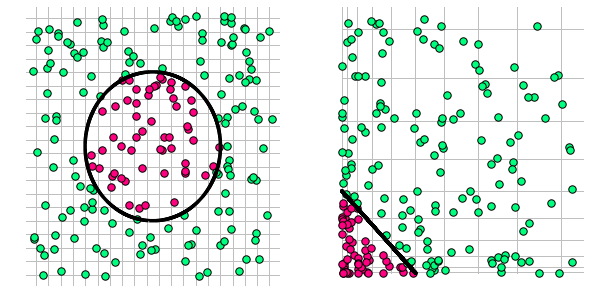

In [11]:
# show the before and after shots from your transformation
demo1.show_before_and_after()

# Space warping with a neural network

Run the Python cells below to see how a basic neural net warps the underlying space of a dataset in order to correctly determine nonlinear separation.  

*Slowly* move this slider from left to right to see how the underlying space of this dataset is warped.  Gridlines are plotted in light gray to help you keep track of the transformations taking place.  Pushing the slider all the way to the right will show the complete transformation - in this space the dataset is perfectly linearly separable. 

**Note:** if you are not using a Docker image of this repo make sure you have installed the [bokeh](http://bokeh.pydata.org/en/latest/) plotting library in order to see this slider animation.  

In [4]:
# make instance of warper
demo2 = warper.warp_demo()
x1,x2 = symbols('x1 x2')

# define your own rules here using elementary functions like sin, cos, tanh, sinc, or any polynomial combination of x1 and x2
rule1 = tanh(x1 + x2 + tanh(x1))
rule2 = tanh(0.1*x1)

# these two lines feed the transformation rules into the warping function and produce a toy dataset based on them
demo2.define_rule(rule1,rule2)
demo2.make_pts()

# this line creates an instance of the slider -  if you do not have bokeh installed you can use the demo1.transformation_slider - this uses matplotlib as the backend (and is considerably slower)
slider2 = demo2.bokeh_transformation_slider()

In [5]:
# activate your slider!
interact(slider2, param=(0,750,1))

You can view still images of the before and after shots from your transformation by activating the next Python cell.

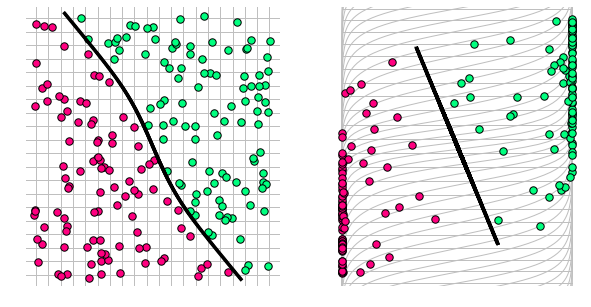

In [14]:
# show the before and after shots from your transformation
demo2.show_before_and_after()

# BONUS SECTION: Space warping with a tree

Run the Python cells below to see how a basic tree warps the underlying space of a dataset in order to correctly determine nonlinear separation.  This one can get quite crazy due to the way we are plotting the transformations!

*Slowly* move this slider from left to right to see how the underlying space of this dataset is warped.  Gridlines are plotted in light gray to help you keep track of the transformations taking place.  Pushing the slider all the way to the right will show the complete transformation - in this space the dataset is perfectly linearly separable. 

**Note:** if you are not using a Docker image of this repo make sure you have installed the [bokeh](http://bokeh.pydata.org/en/latest/) plotting library in order to see this slider animation.  

In [7]:
# make instance of warper
demo3 = warper.warp_demo()
x1,x2 = symbols('x1 x2')

# define your own rules here using elementary functions like sin, cos, tanh, sinc, or any polynomial combination of x1 and x2
rule1 = Piecewise(
    (-1, And(-1 < x1, x1 < 1)),
    (1, x1 > 1),
    (1, x1 < -1)
)
rule2 = Piecewise(
    (-1,And(-1 < x2, x2 < 1)),
    (1, x2 > 1),
    (1, x2 < -1)
)

# these two lines feed the transformation rules into the warping function and produce a toy dataset based on them
demo3.define_rule(rule1,rule2)
demo3.make_pts()

# this line creates an instance of the slider -  if you do not have bokeh installed you can use the demo1.transformation_slider - this uses matplotlib as the backend (and is considerably slower)
slider3 = demo3.bokeh_transformation_slider()

In [8]:
# activate your slider!
interact(slider3, param=(0,750,1))